In [5]:
from read_files import *

np.random.seed(2018)

In [6]:
data = get_data("data/CIAT/")

In [9]:
np.random.seed(2020)
#Obtenido los datos
df=data[data['topic']=='Investigaciòn']
df

,document,topic,file,clean_text
0,About research on Agrobiodiversity in CIAT\nDe...,Investigaciòn,Investigacion 1.txt,"[research, agrobiodiversity, ciat, delivering,..."
1,Tropical Soils Biology Fertility Institute (TS...,Investigaciòn,Investigacion 10.txt,"[tropical, soil, biology, fertility, institute..."
2,The Participatory Research for Development in ...,Investigaciòn,investigacion 11.txt,"[participatory, research, development, upland,..."
3,Cassava\nUp to 1998 cassava research in LAC wa...,Investigaciòn,investigacion 13.txt,"[cassava, cassava, research, lac, led, ciat, c..."
4,"New research at CIAT, using “next-generation\n...",Investigaciòn,Investigacion 14.txt,"[new, research, ciat, using, next, generation,..."
...,...,...,...,...
56,Scientific Fields of Interest: Agriculture.\nM...,Investigaciòn,Investigacion 61.txt,"[scientific, field, interest, agriculture, mai..."
57,Standard crop varieties do not always rise to ...,Investigaciòn,Investigacion 7.txt,"[standard, crop, variety, always, rise, challe..."
58,Big data and mobile technology are widely clai...,Investigaciòn,Investigacion 8.txt,"[big, data, mobile, technology, widely, claime..."
59,"Since the time of the last EPMR, five CCERs we...",Investigaciòn,Investigacion 9.txt,"[since, time, last, epmr, five, ccers, conduct..."


In [39]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [40]:
stop_words = stopwords.words('english')

In [42]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = stop_words).generate(df['document'][0])

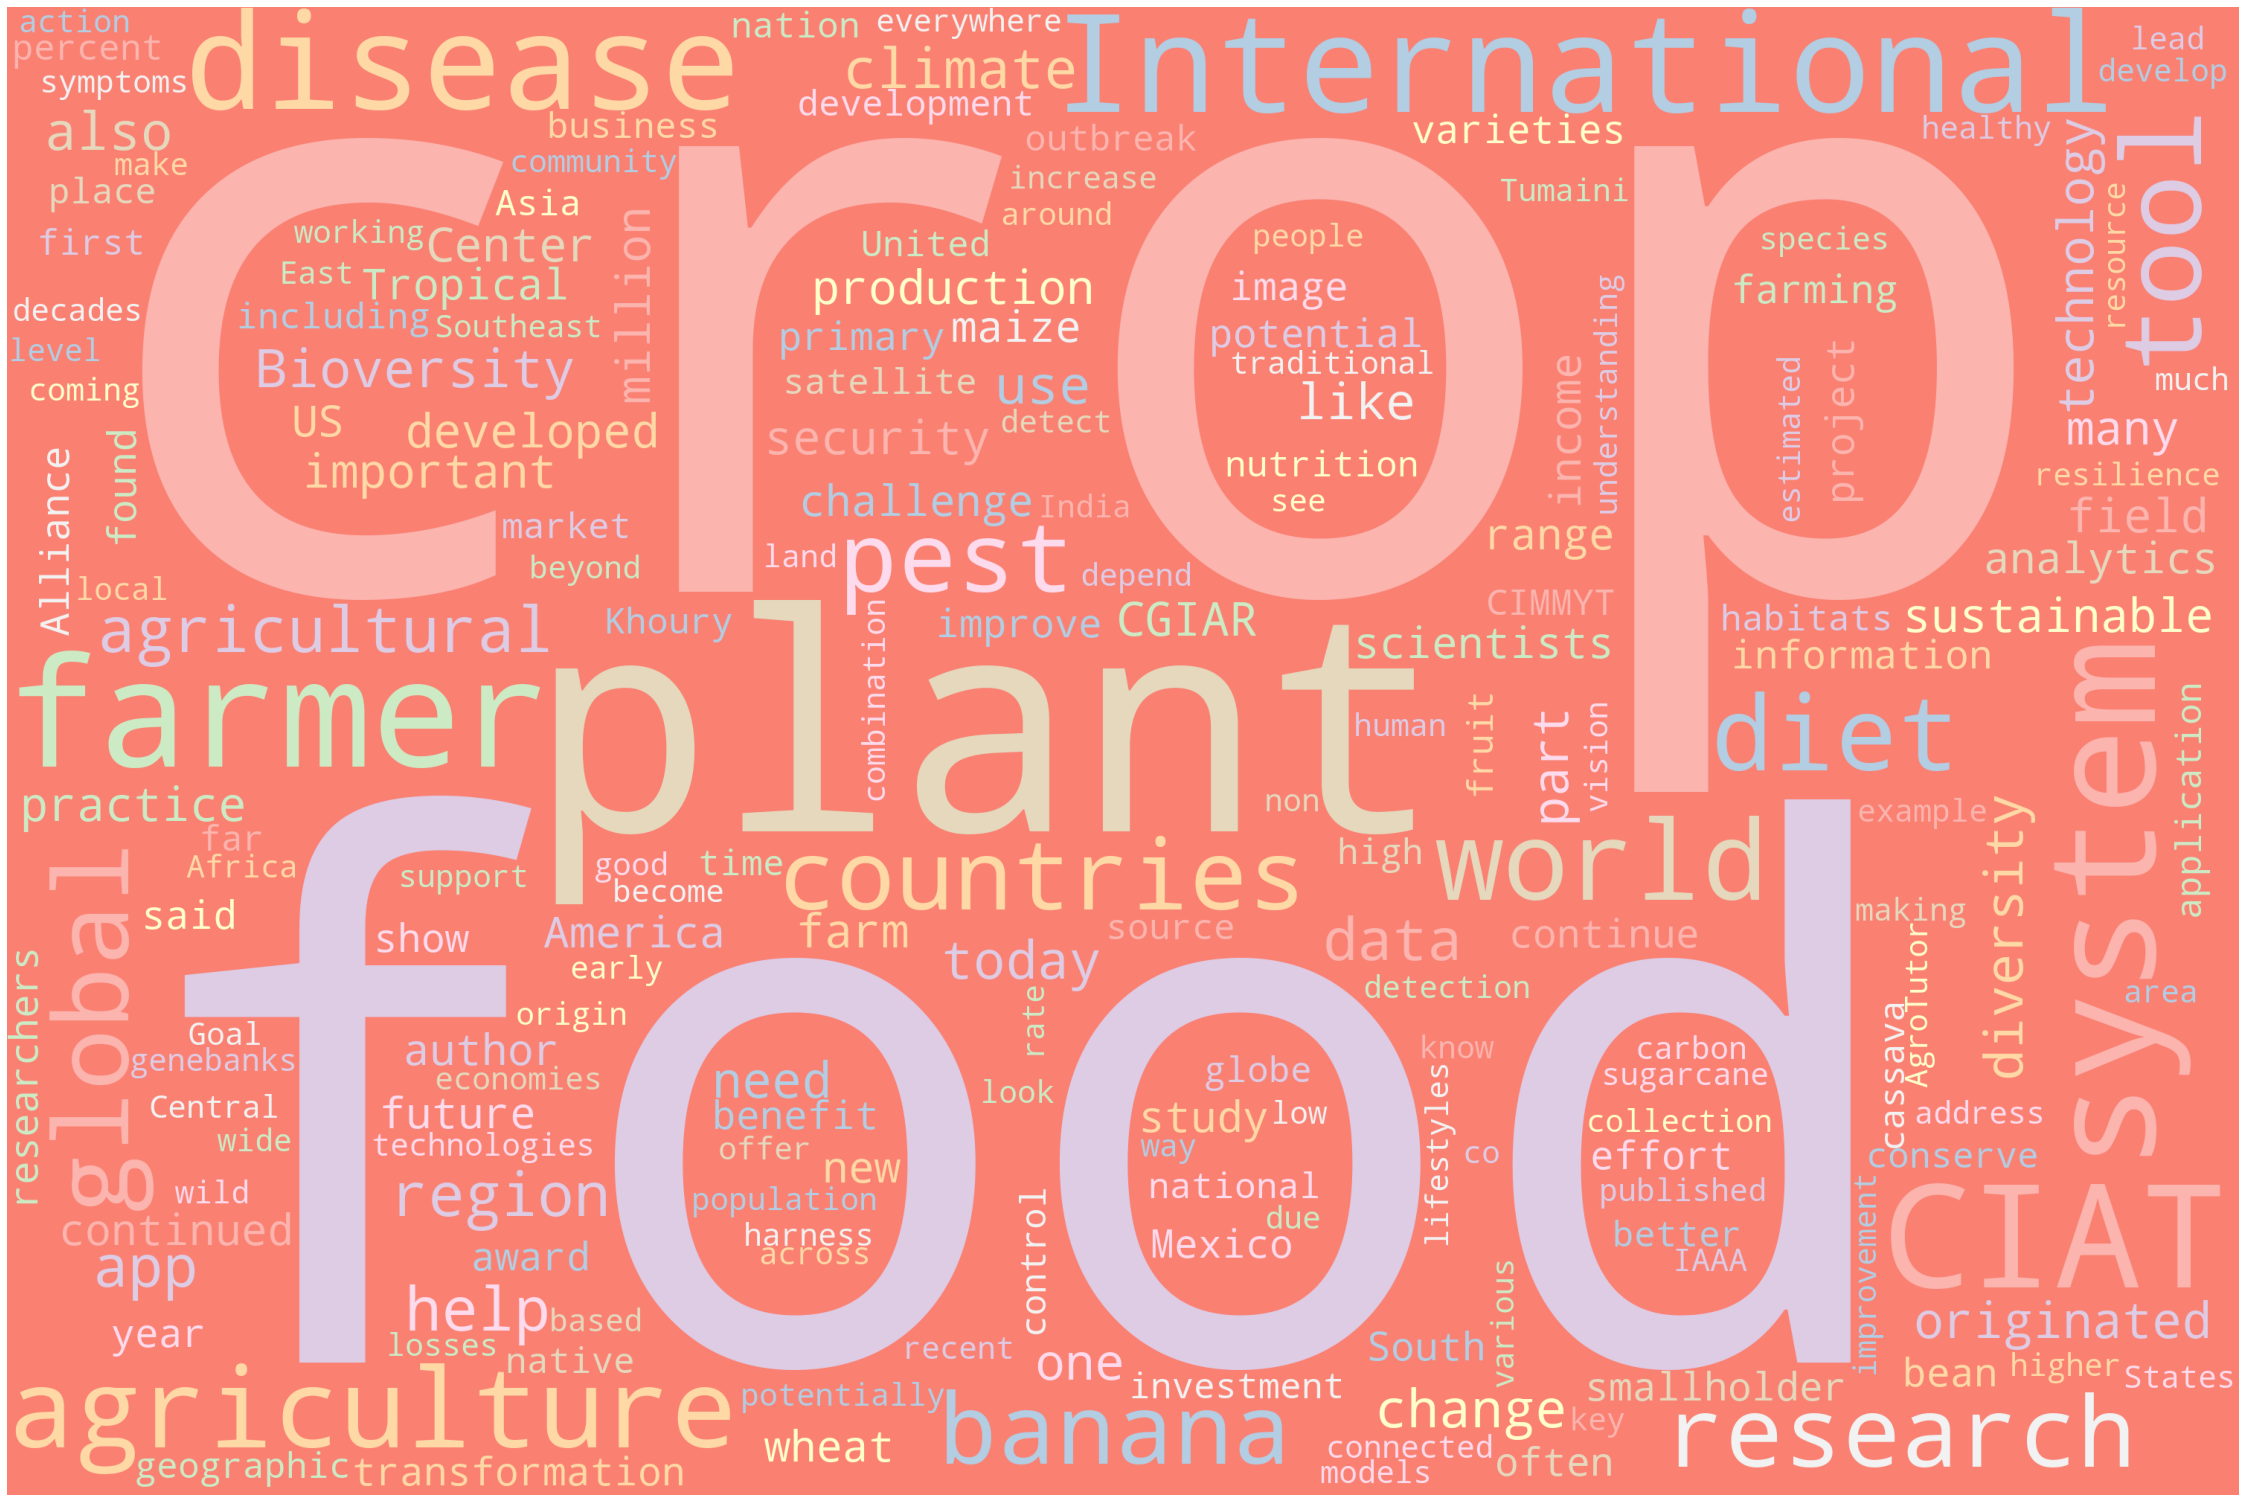

In [43]:
plot_cloud(wordcloud)

In [10]:
#Creando el diccionario
dictionary = gensim.corpora.Dictionary(df['clean_text'])
print(dictionary)

Dictionary(6192 unique tokens: ['accelerate', 'access', 'accessible', 'according', 'accuracy']...)


In [11]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 accelerate
1 access
2 accessible
3 according
4 accuracy
5 accurately
6 achieve
7 across
8 action
9 activity
10 addition


In [12]:
#Creación del corpus
corpus = [dictionary.doc2bow(text) for text in df['clean_text']]
[[(dictionary[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('accelerate', 1),
  ('access', 2),
  ('accessible', 1),
  ('according', 1),
  ('accuracy', 2),
  ('accurately', 1),
  ('achieve', 1),
  ('across', 3),
  ('action', 3),
  ('activity', 1),
  ('addition', 1),
  ('address', 3),
  ('advise', 1),
  ('affect', 1),
  ('afford', 1),
  ('afield', 1),
  ('africa', 3),
  ('ago', 1),
  ('agreed', 1),
  ('agricultural', 13),
  ('agriculture', 17),
  ('agrobiodiversity', 2),
  ('agronomy', 1),
  ('agrotutor', 3),
  ('ahead', 1),
  ('ai', 2),
  ('aim', 1),
  ('alarcón', 1),
  ('alliance', 5),
  ('allied', 1),
  ('almost', 1),
  ('along', 1),
  ('alongside', 1),
  ('already', 3),
  ('also', 9),
  ('alternative', 1),
  ('although', 2),
  ('always', 2),
  ('america', 6),
  ('among', 1),
  ('amount', 1),
  ('amounted', 1),
  ('analysis', 4),
  ('analyst', 1),
  ('analytics', 6),
  ('analyzed', 2),
  ('ancestral', 1),
  ('ancient', 2),
  ('andean', 1),
  ('android', 1),
  ('app', 10),
  ('appeared', 1),
  ('application', 4),
  ('applied', 2),
  ('applyi

In [13]:
#Función para encontrar los parametros optimos del modelo k, alpha, beta
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=df['clean_text'], dictionary=dictionary, coherence='c_v')
    per=lda_model.log_perplexity(corpus)
    return coherence_model_lda.get_coherence(),per

In [14]:
import numpy as np
import tqdm

grid = {}

# Topics range
min_topics = 2
max_topics =4
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.1,0.5, 0.1))
#alpha.append('symmetric')
#alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.2, 0.5, 0.1))
#beta.append('symmetric')

model_results = {'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': [],
                 'Perplejidad': []
                }

In [15]:
# iterate through number of topics
for k in topics_range:
# iterate through alpha values
    for a in alpha:
 # iterare through beta values
        for b in beta:
            cv = compute_coherence_values(corpus=corpus, dictionary=dictionary,k=k, a=a, b=b)
            # Save the model results
            model_results['Topics'].append(k)
            model_results['Alpha'].append(a)
            model_results['Beta'].append(b)
            model_results['Coherence'].append(cv[0])
            model_results['Perplejidad'].append(cv[1]) 
            
Resultados=pd.DataFrame(model_results)

In [21]:
Resultados

,Topics,Alpha,Beta,Coherence,Perplejidad
0,2,0.1,0.2,0.384444,-7.857090
1,2,0.1,0.3,0.386888,-7.831344
2,2,0.1,0.4,0.386888,-7.826319
3,2,0.2,0.2,0.384444,-7.857579
4,2,0.2,0.3,0.386888,-7.831916
5,2,0.2,0.4,0.386888,-7.833459
6,2,0.3,0.2,0.384444,-7.858104
7,2,0.3,0.3,0.386888,-7.832530
8,2,0.3,0.4,0.350422,-7.835109
9,2,0.4,0.2,0.384444,-7.858613


In [19]:
maxValues = Resultados.idxmax() 
maxValues

Topics         12
Alpha           9
Beta            2
Coherence      14
Perplejidad    14
dtype: int64

In [17]:
maxValues = Resultados.idxmax() 
print(maxValues) 

Topics         12
Alpha           9
Beta            2
Coherence      14
Perplejidad    14
dtype: int64


In [22]:
k=12
a=9
b=2
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)

chunksize controla cuántos documentos se procesan a la vez en el algoritmo de entrenamiento. Aumentar el tamaño de los fragmentos acelerará el entrenamiento, al menos mientras el fragmento de documentos quepa fácilmente en la memoria.
pass controla la frecuencia con la que entrenamos el modelo en todo el corpus (establecido en 10). Otra palabra para pases podría ser "épocas". iteraciones es algo técnico, pero esencialmente controla la frecuencia con la que repetimos un ciclo particular sobre cada documento. Es importante establecer el número de "pasos" e "iteraciones" lo suficientemente alto.

In [23]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.


Perplexity:  -8.160574120279454


In [24]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=df['clean_text'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5396836810762874


In [27]:
#Modulos para los graifcos
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt

In [28]:
# Visualize the topics

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus,dictionary)
vis

/home/wilmar3752/anaconda3/envs/nlp/lib/python3.10/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/home/wilmar3752/anaconda3/envs/nlp/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/home/wilmar3752/anaconda3/envs/nlp/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/home/wilmar3752/anaconda3/envs/nlp/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of impo

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.102516  0.000075       1        1  76.094193
2      0.005339 -0.000942       2        1   5.351078
5     -0.009576  0.001196       3        1   1.863773
0     -0.010089  0.000796       4        1   1.862245
6     -0.009737  0.001037       5        1   1.861341
8     -0.010204  0.000648       6        1   1.859495
1     -0.010657  0.000153       7        1   1.857100
3     -0.010759  0.000095       8        1   1.855657
11    -0.011297 -0.000385       9        1   1.852836
7     -0.011581 -0.000694      10        1   1.849484
4     -0.011799 -0.000825      11        1   1.847734
10    -0.012156 -0.001155      12        1   1.845065, topic_info=            Term        Freq       Total Category  logprob  loglift
1312     service   47.000000   47.000000  Default  30.0000  30.0000
336      farming   39.000000   39.000000  Default  29.0000  29.0000
775   scientific   54.000000   54.000000  Default  28.0000  28.0000
740     research  317.000000  317.000000  Default  27.0000  27.0000
1210        main   42.000000   42.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
517         line    0.189232   63.606936  Topic12  -8.2422  -1.8249
144         ciat    0.194820  172.566805  Topic12  -8.2131  -2.7938
1324        soil    0.188428   79.710421  Topic12  -8.2465  -2.0548
205         crop    0.192886  151.814900  Topic12  -8.2231  -2.6757
684   production    0.185740   96.069982  Topic12  -8.2608  -2.2558

[1169 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
3364      1  0.640211  absorption
1         1  0.764677      access
1         2  0.182066      access
7         1  0.910367      across
7         2  0.055174      across
...     ...       ...         ...
927       1  0.963714     variety
4283      1  0.673954  veterinary
1594      1  0.968075       water
1594      2  0.013082       water
4190      1  0.711862        wood

[291 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 3, 6, 1, 7, 9, 2, 4, 12, 8, 5, 11])

El control deslizante λ permite clasificar los términos según su relevancia. De forma predeterminada,
los términos de un tema se clasifican en orden decreciente según su probabilidad específica del tema ( λ = 1 ). 
Mover el control deslizante permite ajustar la clasificación de los términos según su grado de discriminación 
(o "relevancia") para el tema específico. El valor "óptimo" sugerido de λ es 0,6.

El mapa de distancia entre temas es una visualización de los temas en un espacio bidimensional.

El área de estos círculos de temas es proporcional a la cantidad de palabras que pertenecen a cada tema en el diccionario.

El gráfico de barras muestra por defecto los 30 términos más destacados. Las barras indican la frecuencia total del término en todo el corpus. 

Salient es una métrica específica, definida en la parte inferior de la visualización, 
que se puede considerar como una métrica utilizada para identificar las palabras más informativas 
o útiles para identificar temas en toda la colección de textos.

In [29]:
# Show topics
topics = lda_model.show_topics()
print(topics)

[(3, '0.001*"research" + 0.000*"main" + 0.000*"scientific" + 0.000*"training" + 0.000*"product" + 0.000*"development" + 0.000*"facility" + 0.000*"field" + 0.000*"number" + 0.000*"activity"'), (6, '0.001*"research" + 0.000*"main" + 0.000*"scientific" + 0.000*"training" + 0.000*"product" + 0.000*"development" + 0.000*"field" + 0.000*"facility" + 0.000*"number" + 0.000*"plant"'), (0, '0.001*"research" + 0.000*"main" + 0.000*"scientific" + 0.000*"training" + 0.000*"product" + 0.000*"development" + 0.000*"facility" + 0.000*"field" + 0.000*"plant" + 0.000*"number"'), (11, '0.001*"research" + 0.000*"main" + 0.000*"training" + 0.000*"scientific" + 0.000*"product" + 0.000*"development" + 0.000*"facility" + 0.000*"number" + 0.000*"biology" + 0.000*"activity"'), (4, '0.001*"research" + 0.000*"main" + 0.000*"scientific" + 0.000*"training" + 0.000*"product" + 0.000*"facility" + 0.000*"development" + 0.000*"number" + 0.000*"activity" + 0.000*"biology"'), (7, '0.001*"research" + 0.000*"main" + 0.000*

In [30]:
# Distribution of topics for the document
print(lda_model.get_document_topics(corpus[0]))
print(lda_model.get_document_topics(corpus[1]))
print(lda_model.get_document_topics(corpus[2]))
print(lda_model.get_document_topics(corpus[3]))
print(lda_model.get_document_topics(corpus[4]))
print(lda_model.get_document_topics(corpus[5]))
print(lda_model.get_document_topics(corpus[6]))
print(lda_model.get_document_topics(corpus[7]))
print(lda_model.get_document_topics(corpus[8]))
print(lda_model.get_document_topics(corpus[9]))
print(lda_model.get_document_topics(corpus[10]))
print(lda_model.get_document_topics(corpus[11]))
print(lda_model.get_document_topics(corpus[12]))
print(lda_model.get_document_topics(corpus[13]))

[(9, 0.91140157)]
[(0, 0.014043449), (1, 0.014022831), (2, 0.015570523), (3, 0.0139745325), (4, 0.013961378), (5, 0.014047265), (6, 0.014032102), (7, 0.013953392), (8, 0.014028362), (9, 0.8444467), (10, 0.013935682), (11, 0.013983754)]
[(0, 0.033178993), (1, 0.033150233), (2, 0.036991555), (3, 0.033089295), (4, 0.033015627), (5, 0.03323749), (6, 0.03320533), (7, 0.033041157), (8, 0.033163577), (9, 0.631922), (10, 0.032939974), (11, 0.033064768)]
[(0, 0.024483733), (1, 0.024435328), (2, 0.026953425), (3, 0.02435538), (4, 0.024326544), (5, 0.02448938), (6, 0.024457252), (7, 0.024326686), (8, 0.024452128), (9, 0.72906077), (10, 0.024286183), (11, 0.024373222)]
[(0, 0.01504304), (1, 0.015009578), (2, 0.015691757), (3, 0.015001234), (4, 0.014973601), (5, 0.015058653), (6, 0.015050889), (7, 0.014969303), (8, 0.015033111), (9, 0.83421236), (10, 0.014965951), (11, 0.014990472)]
[(0, 0.01582364), (1, 0.015795909), (2, 0.017679356), (3, 0.015792865), (4, 0.015743868), (5, 0.015847394), (6, 0.015

In [31]:
data

,document,topic,file,clean_text
0,About research on Agrobiodiversity in CIAT\nDe...,Investigaciòn,Investigacion 1.txt,"[research, agrobiodiversity, ciat, delivering,..."
1,Tropical Soils Biology Fertility Institute (TS...,Investigaciòn,Investigacion 10.txt,"[tropical, soil, biology, fertility, institute..."
2,The Participatory Research for Development in ...,Investigaciòn,investigacion 11.txt,"[participatory, research, development, upland,..."
3,Cassava\nUp to 1998 cassava research in LAC wa...,Investigaciòn,investigacion 13.txt,"[cassava, cassava, research, lac, led, ciat, c..."
4,"New research at CIAT, using “next-generation\n...",Investigaciòn,Investigacion 14.txt,"[new, research, ciat, using, next, generation,..."
...,...,...,...,...
84,The second meeting of the Colombian Forage Net...,Redes,redes de actores.txt,"[second, meeting, colombian, forage, network, ..."
85,The Technologies for African Agricultural Tran...,Transferencia de Tecnologia,transferencia 1.txt,"[technology, african, agricultural, transforbi..."
86,Transfer 2\nMexican primary sector needs a rep...,Transferencia de Tecnologia,Transferencia 2.txt,"[transfer, mexican, primary, sector, need, rep..."
87,The Weather-rice-nutrient integrated decision ...,Transferencia de Tecnologia,Transferencia 3.txt,"[weather, rice, nutrient, integrated, decision..."


In [ ]:
corpus

[[(0, 1),
  (1, 2),
  (2, 1),
  (3, 1),
  (4, 2),
  (5, 1),
  (6, 1),
  (7, 3),
  (8, 3),
  (9, 1),
  (10, 1),
  (11, 3),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 3),
  (17, 1),
  (18, 1),
  (19, 13),
  (20, 17),
  (21, 2),
  (22, 1),
  (23, 3),
  (24, 1),
  (25, 2),
  (26, 1),
  (27, 1),
  (28, 5),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 3),
  (34, 1),
  (35, 2),
  (36, 2),
  (37, 6),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 4),
  (42, 1),
  (43, 6),
  (44, 2),
  (45, 1),
  (46, 2),
  (47, 1),
  (48, 1),
  (49, 10),
  (50, 1),
  (51, 4),
  (52, 2),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 3),
  (57, 1),
  (58, 3),
  (59, 1),
  (60, 2),
  (61, 4),
  (62, 1),
  (63, 2),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 6),
  (68, 1),
  (69, 2),
  (70, 1),
  (71, 1),
  (72, 5),
  (73, 1),
  (74, 2),
  (75, 1),
  (76, 2),
  (77, 13),
  (78, 1),
  (79, 1),
  (80, 2),
  (81, 1),
  (82, 3),
  (83, 5),
  (84, 3),
  (85, 2),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 1),
  (90, 1),
  (91

In [ ]:
from pprint import pprint
# Imprimir la palabra clave
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.010*"crop" + 0.008*"food" + 0.008*"agriculture" + 0.006*"international" + '
  '0.006*"farmer" + 0.006*"farming" + 0.006*"system" + 0.005*"country" + '
  '0.005*"access" + 0.005*"technology"'),
 (1,
  '0.008*"cgiar" + 0.007*"development" + 0.006*"investment" + 0.006*"system" + '
  '0.006*"approach" + 0.005*"cassava" + 0.005*"based" + 0.005*"rainfall" + '
  '0.005*"model" + 0.005*"project"'),
 (2,
  '0.010*"region" + 0.009*"soil" + 0.007*"cassava" + 0.007*"regional" + '
  '0.006*"africa" + 0.006*"program" + 0.006*"tsbf" + 0.006*"project" + '
  '0.005*"system" + 0.005*"climate"'),
 (3,
  '0.006*"climate" + 0.005*"model" + 0.005*"management" + 0.005*"system" + '
  '0.004*"new" + 0.004*"project" + 0.004*"crop" + 0.004*"agriculture" + '
  '0.003*"study" + 0.003*"program"')]
